In [1]:
import pandas as pd
import geopandas
import plotly.express as px
import os
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt
import imageio
import mapclassify
import matplotlib
import warnings
warnings.filterwarnings("ignore")
import matplotlib.image as mpimg
import ast
import json

In [2]:
visitors_2018 = pd.read_csv('/Volumes/xuyilun/课题/Human Dynamics/safegraph/GOOGLEDRIVES/data/All_stores_total_visitors_2018.csv').drop(
    columns = ['Unnamed: 0','total_visitors'], axis =1)
visitors_2019 = pd.read_csv('/Volumes/xuyilun/课题/Human Dynamics/safegraph/GOOGLEDRIVES/data/All_stores_total_visitors_2019.csv').drop(
    columns = ['Unnamed: 0','total_visitors'], axis =1)
location = pd.read_csv('/Volumes/xuyilun/课题/Human Dynamics/safegraph/GOOGLEDRIVES/data/all_info_after_aggregation.csv').drop(
    columns = ['Unnamed: 0'], axis =1)
storename = pd.read_excel('/Volumes/xuyilun/课题/Human Dynamics/safegraph/PSO/results/results-1yilun.xlsm')

In [3]:
def change_string(string):
    if 'sg' in string:
        string = 'sg:'+string[3:]
        return string
    else:
        return string

In [4]:
storename['store-id'] = storename['store-id'].apply(lambda x: change_string(x))

In [5]:
location

,safegraph_place_id,geo,area_square_feet
0,sg:81aae721ea114787a6e105b349eeb400,"(40.768158, -73.96154)",19853
1,sg:1ac978d80ab84d4aa1d9f7148d1fafb8,"(40.783772, -73.833733)",68087
2,sg:72ea28e3e1a54cc0849b69121b98e1cd,"(40.684647, -73.976486)",126053
3,sg:084ab2c726784ab490b72144d44d4ee8,"(40.631371, -73.946744)",40818
4,sg:eb96ed984b274a57ae29762d73738d99,"(40.607664, -73.959466)",18706
...,...,...,...
280,sg:84a8615ac25b455bb1d01ec4c93cdd1f,"(40.583277, -74.165371)",96668
281,sg:ede0c3b8b3a143848181ee2430390072,"(40.659248, -73.908321)",5885
282,aggregated_517E,"(40.795408, -73.93100799999999)",169356
283,aggregated_4024_College,"(40.757749, -73.834744)",214735


In [6]:
location['longitude'] = location['geo'].apply(lambda x:ast.literal_eval(x)[1])
location['latitude'] = location['geo'].apply(lambda x:ast.literal_eval(x)[0])
geometry = [Point(xy) for xy in zip(location.longitude, location.latitude)]
location = location.drop(['longitude', 'latitude','geo'], axis=1)
location = GeoDataFrame(location, crs="EPSG:4326", geometry=geometry)

In [7]:
location_target = location[location['safegraph_place_id'].isin(storename['store-id'].tolist())]

In [8]:
location_info = pd.merge(location_target, storename, left_on = 'safegraph_place_id', right_on = ['store-id'])

In [9]:
location_info

,safegraph_place_id,area_square_feet,geometry,store-id,store-name,huff-ft-18,huff-mft-18,base-ft-18,base-mft-18,base-div-18,huff-ft-19,huff-mft-19,base-ft-19,base-mft-19,base-div-19,huff-ft-1819,huff-mft-1819
0,sg:81aae721ea114787a6e105b349eeb400,19853,POINT (-73.96154 40.76816),sg:81aae721ea114787a6e105b349eeb400,T18,8,8,5,5,11,7,8,5,5,11,8,9
1,sg:1ac978d80ab84d4aa1d9f7148d1fafb8,68087,POINT (-73.83373 40.78377),sg:1ac978d80ab84d4aa1d9f7148d1fafb8,T07,13,13,19,19,13,12,12,18,18,14,13,13
2,sg:084ab2c726784ab490b72144d44d4ee8,40818,POINT (-73.94674 40.63137),sg:084ab2c726784ab490b72144d44d4ee8,T02,15,15,17,17,14,15,15,16,16,13,15,15
3,sg:eb96ed984b274a57ae29762d73738d99,18706,POINT (-73.95947 40.60766),sg:eb96ed984b274a57ae29762d73738d99,T19,11,11,7,7,4,14,14,10,11,8,12,12
4,sg:5fe86b949ad24e79b59672ae1b6d148d,39355,POINT (-74.01115 40.71467),sg:5fe86b949ad24e79b59672ae1b6d148d,T10,6,6,12,12,19,5,7,11,10,18,5,5
5,sg:7a48b2cf2a904e9ebbdef801d0576c4d,151960,POINT (-74.16690 40.57472),sg:7a48b2cf2a904e9ebbdef801d0576c4d,T01,16,16,18,18,8,17,16,19,19,4,16,16
6,sg:cffe77a3b2f543af9387cdc0a69cb0b8,150619,POINT (-74.23253 40.52864),sg:cffe77a3b2f543af9387cdc0a69cb0b8,T08,17,17,15,15,1,18,18,17,17,1,18,17
7,sg:fd4bf1e165794ab99140ca0bb2d5e022,28280,POINT (-73.98692 40.71621),sg:fd4bf1e165794ab99140ca0bb2d5e022,T05,7,7,6,6,2,9,9,9,7,3,9,8
8,sg:268ea7486c334ad8ad2d0e4e08f3ff9e,20923,POINT (-73.98289 40.69138),sg:268ea7486c334ad8ad2d0e4e08f3ff9e,T20,9,9,13,13,18,3,4,12,12,19,6,6
9,sg:e2543bebe82742a1941c21660d9f4168,30554,POINT (-73.97972 40.72979),sg:e2543bebe82742a1941c21660d9f4168,T11,5,5,8,8,5,6,6,6,6,7,7,7


In [10]:
info_dict = {}
for i,cont in location.iterrows():
    info_dict[cont['safegraph_place_id']] = cont['geometry']

In [11]:
with open('/Volumes/xuyilun/课题/Human Dynamics/safegraph/nyc_cbgs.json') as f:
    cbg_data = json.load(f)
cbg_info = cbg_data['features']
cbgs = visitors_2018.cbg.tolist()

In [12]:
shp_path = '/Volumes/xuyilun/课题/Human Dynamics/safegraph/tl_2017_36_bg/tl_2017_36_bg.shp'

In [13]:
shp_df = geopandas.GeoDataFrame.from_file(shp_path,encoding = 'gb18030')
#shp_df = shp_df[shp_df['GEOID'].isin(nyc_cbg)].reset_index()

In [14]:
cbg_info = {}
cbg_id = shp_df['GEOID'].tolist()
cbg_geo = shp_df['geometry'].tolist()
for i in range(len(cbg_id)):
    cbg_info[cbg_id[i]] = cbg_geo[i]

In [15]:
visitors_2018['cbg_geometry'] = visitors_2018['cbg'].apply(lambda x: cbg_info[str(x)])
visitors_2019['cbg_geometry'] = visitors_2019['cbg'].apply(lambda x: cbg_info[str(x)])

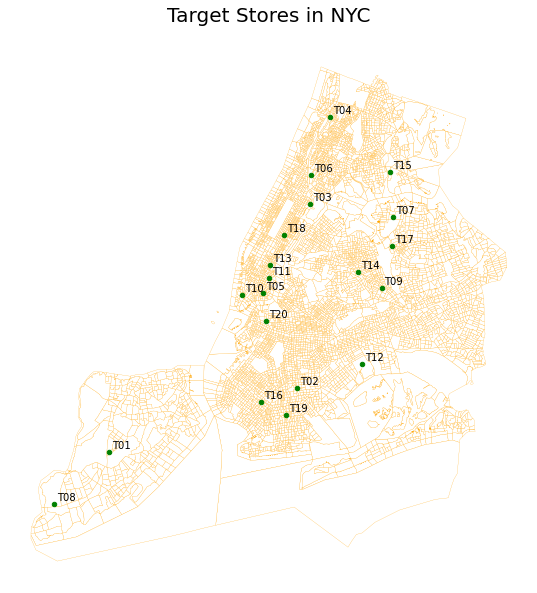

In [16]:
p = location_info.copy()
fig, ax = plt.subplots(1, 1, figsize=[15,10])
temp = visitors_2018.copy()
temp = GeoDataFrame(temp,geometry = 'cbg_geometry')
temp.plot(ax=ax, color='white', edgecolor='orange',linewidth=0.2)
p.plot(ax=ax, marker='o', color = 'green', markersize=20)
for x, y, label,text in zip(p.geometry.x, p.geometry.y, p.safegraph_place_id, p['store-name']):
    ax.annotate(text, xy=(x, y), xytext=(3, 3), textcoords="offset points")
#plt.suptitle('Suggested Stores to be Closed',size = 20)
plt.title('Target Stores in NYC' , size = 20, pad=20, loc='center')
plt.axis('off')
save_path = '/Volumes/xuyilun/课题/Human Dynamics/safegraph/GOOGLEDRIVES/figures/Target_Stores_in_NYC.png'
plt.savefig(save_path,dpi=100)

## monthly visits (all cbgs)

In [17]:
com_path = '/Volumes/xuyilun/课题/Human Dynamics/safegraph/filtered_competitors_0201_matrix'
tar_path = '/Volumes/xuyilun/课题/Human Dynamics/safegraph/filtered_target_0201_matrix_aggregated'
com_files = os.listdir(com_path)
tar_files = os.listdir(tar_path)
months = [i[:7] for i in com_files]
com_files = [com_path+'/'+i for i in com_files]
tar_files = [tar_path+'/'+i for i in tar_files]

In [18]:
def get_total_visits(month):
    com = [i for i in com_files if month in i][0]
    tar = [i for i in tar_files if month in i][0]
    com_df = pd.read_csv(com).drop(columns = ['Unnamed: 0'], axis =1)
    tar_df = pd.read_csv(tar).drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], axis =1)
    com_num = com_df.values.sum()
    tar_num = tar_df.values.sum()
    return tar_num+com_num

In [19]:
visits = {'Month':[], 'Total_visitors': []}
for i in months:
    visits['Month'].append(i)
    visits['Total_visitors'].append(get_total_visits(i))

In [20]:
visits_df = pd.DataFrame(visits)

In [21]:
visits_df.to_csv('/Volumes/xuyilun/课题/Human Dynamics/safegraph/GOOGLEDRIVES/data/Total_visitors_(all_added_together).csv')

## monthly visits (each cbgs)

In [22]:
def get_total_visits_each_cbg(month):
    com = [i for i in com_files if month in i][0]
    tar = [i for i in tar_files if month in i][0]
    com_df = pd.read_csv(com).rename(columns={'Unnamed: 0': "cbg"})
    tar_df = pd.read_csv(tar).drop(columns = ['Unnamed: 0'], axis =1).rename(columns={'Unnamed: 0.1': "cbg"})
    total_df = pd.merge(com_df, tar_df, on = 'cbg')
    total_df['total_visitors'] = total_df.drop(columns = ['cbg'], axis =1).sum(axis=1)
    info = {}
    for i,cont in total_df.iterrows():
        info[cont.cbg] = cont.total_visitors
    #com_num = com_df.values.sum()
    #tar_num = tar_df.values.sum()
    return total_df[['cbg', 'total_visitors']]

In [23]:
visits_per_cbg = {'cbg':cbgs}
visits_per_cbg_df = pd.DataFrame(visits_per_cbg)
for month in months:
    temp_df = get_total_visits_each_cbg(month)
    visits_per_cbg_df = pd.merge(visits_per_cbg_df,temp_df, on = 'cbg')
    visits_per_cbg_df = visits_per_cbg_df.rename(columns={'total_visitors': month})

In [24]:
visits_per_cbg_df

,cbg,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
0,360050001000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,360050001001,12,0,0,4,12,4,0,0,8,...,4,4,0,0,0,0,4,0,4,4
2,360050002000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,360050002001,10,26,59,61,64,63,36,31,27,...,18,24,24,7,17,33,40,9,33,31
4,360050002002,59,47,66,69,72,72,81,62,95,...,49,34,31,40,39,30,32,40,38,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,360850319022,79,56,83,90,128,117,77,99,78,...,106,70,76,101,102,72,128,61,79,85
6489,360850319023,58,59,64,75,95,87,71,66,102,...,102,53,61,65,75,96,139,38,57,60
6490,360850323000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6491,360850323001,13,37,45,55,79,83,82,72,91,...,80,42,50,50,60,73,125,70,79,98


In [25]:
visits_per_cbg_df.to_csv('/Volumes/xuyilun/课题/Human Dynamics/safegraph/GOOGLEDRIVES/data/Total_visitors_per_cbg_(all_added_together).csv')